In [2]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed/moon_filtered.png


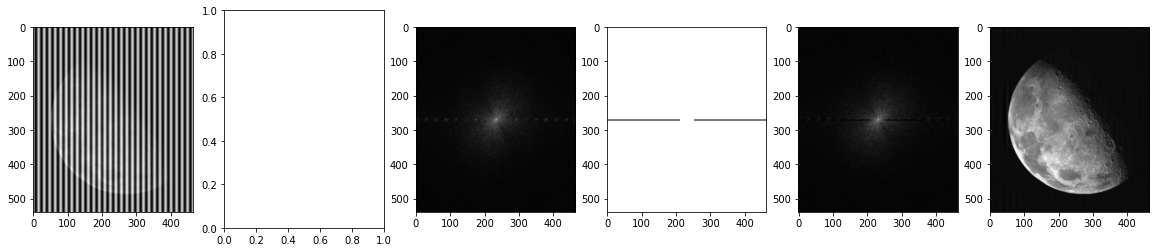

In [25]:
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)
    


    ### START YOUR CODE HERE ### (You can change anything inside this block)
    fft_kernel = np.array([[ 1  for x in range(0, len(y))] for y in im])
    
    for y in range(0, 3):
        for x in range(20, len(fft_kernel[y]) // 2):
            fft_kernel[y][x] = 0
        for x in range(len(fft_kernel[y]) // 2, len(fft_kernel[y]) -20):
            fft_kernel[y][x] = 0
            
            
    
    fft_im = np.fft.fft2(im)
    fft_im_filtered = fft_im * fft_kernel

    fft_im_viz = np.fft.fftshift(fft_im)
    fft_im_viz = np.log(magnitude(fft_im_viz)+1)
    
    fft_kernel_viz = np.fft.fftshift(fft_kernel)
    fft_kernel_viz = np.log(magnitude(fft_kernel_viz)+1)
    
    fft_im_filtered_viz = np.fft.fftshift(fft_im_filtered)
    fft_im_filtered_viz = np.log(magnitude(fft_im_filtered_viz)+1)
    
    im_filtered = np.fft.ifft2(fft_im_filtered).real
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 6, 1)
    plt.imshow(im, cmap="gray")
    plt.subplot(1, 6, 2)
   # plt.imshow(kernel, cmap="gray")
    plt.subplot(1, 6, 3)
    plt.imshow(fft_im_viz, cmap="gray")
    plt.subplot(1, 6, 4)
    plt.imshow(fft_kernel_viz, cmap="gray")
    plt.subplot(1, 6, 5)
    plt.imshow(fft_im_filtered_viz, cmap="gray")
    plt.subplot(1, 6, 6)
    plt.imshow(im_filtered, cmap="gray")
    

    
    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))